In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [ ]:
df = pd.read_csv("data.csv", encoding="latin1")

x = pd.to_numeric(df["no2"], errors="coerce")
x = x.dropna()
x = x[x >= 0]
x = x.to_numpy(dtype=np.float64)

print(len(x))


/tmp/ipython-input-3861916572.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding="latin1")


419509


In [ ]:
roll_num = 102303785

a_r = 0.05 * (roll_num % 7)
b_r = 0.3 * ((roll_num % 5) + 1)

print(a_r, b_r)


0.15000000000000002 0.3


In [ ]:
z = x + a_r * np.sin(b_r * x)

print(len(z), z.min(), z.max())


419509 0.0 875.8667444845614


In [7]:
mu_hat = float(np.mean(z))
var_hat = float(np.mean((z - mu_hat) ** 2))

lambda_hat = float(1.0 / (2.0 * var_hat))
c_hat = float(np.sqrt(lambda_hat / np.pi))

print("Estimated Parameters")
print("--------------------")
print(f"mu        = {mu_hat}")
print(f"lambda     = {lambda_hat}")
print(f"c             = {c_hat}")


Estimated Parameters
--------------------
mu (μ)        = 25.804484510102007
lambda (λ)    = 0.0014602636800887954
c             = 0.02155960031650373


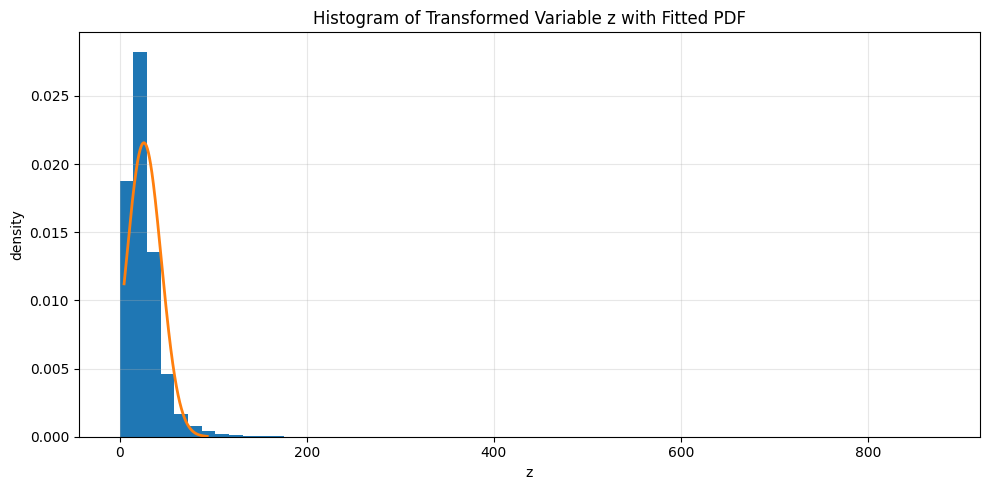

In [10]:
def pdf_est(z_vals, lam, mu, c):
    return c * np.exp(-lam * (z_vals - mu) ** 2)

z_grid = np.linspace(np.percentile(z, 1), np.percentile(z, 99), 500)
pdf_vals = pdf_est(z_grid, lambda_hat, mu_hat, c_hat)

out_dir = Path("outputs")
out_dir.mkdir(exist_ok=True)

plt.figure(figsize=(10, 5))
plt.hist(z, bins=60, density=True)
plt.plot(z_grid, pdf_vals, linewidth=2)
plt.xlabel("z")
plt.ylabel("density")
plt.title("Histogram of Transformed Variable z with Fitted PDF")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig(out_dir / "fit_plot.png", dpi=200)
plt.show()


In [11]:
summary = pd.DataFrame([{
    "roll_number": roll_num,
    "a_r": a_r,
    "b_r": b_r,
    "mu_hat": mu_hat,
    "lambda_hat": lambda_hat,
    "c_hat": c_hat,
    "samples": len(z)
}])

out_dir = Path("outputs")
out_dir.mkdir(exist_ok=True)

summary.to_csv(out_dir / "estimated_parameters.csv", index=False)

print("Saved")


Saved
